# Libraries

In [176]:
import pandas as pd
import numpy as np

from typing import List
from dateutil.relativedelta import relativedelta

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Data Load

In [163]:
data = pd.read_pickle('../data/data.pickle')

# Strategies

## Buy and Hold

### Strategy 1
start: 2017-11-17

<AxesSubplot:xlabel='Date'>

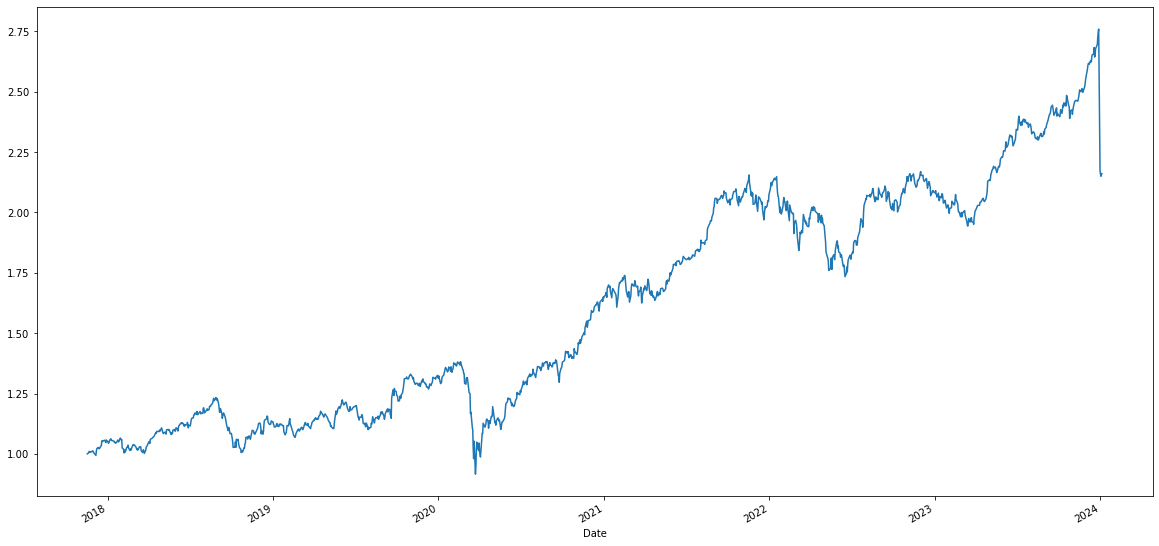

In [9]:
data_for_buy_and_hold = (
    (data.reset_index().pivot(index='Date', columns=['symbol'], values='Close').dropna().sum(axis=1)
     / data.reset_index().pivot(index='Date', columns=['symbol'], values='Close').dropna().sum(axis=1).iloc[0])
)
    

plt.figure(figsize=(20, 10))
data_for_buy_and_hold.plot()

### Strategy 2
start: 2018-12-01  
Rebalance: every month

In [29]:
data_for_buy_and_hold = (
    (data.reset_index().pivot(index='Date', columns=['symbol'], values='Close').dropna().sum(axis=1))
    .reset_index().query('Date.dt.strftime("%Y") >= "2017-12-01"')
    .rename(columns={0: 'profit'})
)
data_for_buy_and_hold['year_month'] = data_for_buy_and_hold.Date.dt.strftime('%Y-%m')

<AxesSubplot:xlabel='year_month'>

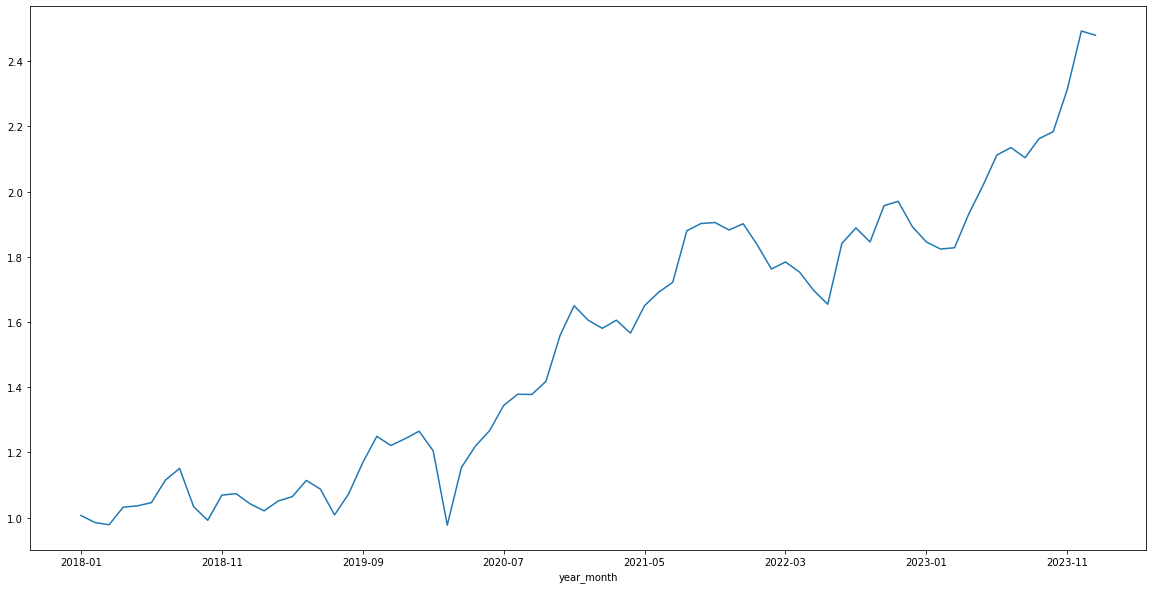

In [63]:
plt.figure(figsize=(20, 10))
(data_for_buy_and_hold.groupby('year_month').profit.apply(lambda x: x.iloc[-1]) / data_for_buy_and_hold.groupby('year_month').profit.apply(lambda x: x.iloc[0])).cumprod().plot()

### Compare

In [181]:
data_for_buy_and_hold = (
    (data.query('Date.dt.strftime("%Y-%m") >= "2017-12"').reset_index().pivot(index='Date', columns=['symbol'], values='Close').dropna().sum(axis=1)
     / data.query('Date.dt.strftime("%Y-%m") >= "2017-12"').reset_index().pivot(index='Date', columns=['symbol'], values='Close').dropna().sum(axis=1).iloc[0])
)
data_for_buy_and_hold = data_for_buy_and_hold.to_frame().rename(columns={0: 'profit'})
data_for_buy_and_hold['strategy'] = 'Buy and Hold'
data_for_buy_and_hold.reset_index(inplace=True)
data_for_buy_and_hold['Date'] = data_for_buy_and_hold.Date.dt.strftime('%Y-%m-%d')
data_for_buy_and_hold.Date = pd.to_datetime(data_for_buy_and_hold.Date, format='%Y-%m-%d')


data_for_buy_and_hold_monthly = (
    (data.reset_index().pivot(index='Date', columns=['symbol'], values='Close').dropna().sum(axis=1))
    .reset_index().query('Date.dt.strftime("%Y-%m") >= "2017-12"')
    .rename(columns={0: 'profit'})
)
data_for_buy_and_hold_monthly['Date'] = data_for_buy_and_hold_monthly.Date.dt.strftime('%Y-%m')
data_for_buy_and_hold_monthly.Date = pd.to_datetime(data_for_buy_and_hold_monthly.Date, format='%Y-%m')
data_for_buy_and_hold_monthly.Date = data_for_buy_and_hold_monthly.Date.apply(lambda x: x + relativedelta(months=1) - pd.Timedelta(value='1d'))
data_for_buy_and_hold_monthly = (data_for_buy_and_hold_monthly.groupby('Date').profit.apply(lambda x: x.iloc[-1]) / data_for_buy_and_hold_monthly.groupby('Date').profit.apply(lambda x: x.iloc[0])).cumprod()
data_for_buy_and_hold_monthly = data_for_buy_and_hold_monthly.to_frame()
data_for_buy_and_hold_monthly['strategy'] = 'Buy and Hold (monthly)'
data_for_buy_and_hold_monthly.reset_index(inplace=True)

In [182]:
plt.figure(figsize=(20, 10))
px.line(
    pd.concat(
        [data_for_buy_and_hold, data_for_buy_and_hold_monthly],
        ),
    x='Date',
    y='profit',
    color='strategy'
)


/Users/mjh/opt/anaconda3/lib/python3.9/site-packages/_plotly_utils/basevalidators.py:107: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



<Figure size 1440x720 with 0 Axes>